# Federico Ariton
### Master in Data Analytics
### CA 2 Integrated
### Student Number:sba22090

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Reload the newly uploaded CSV file to ensure we have the latest data
file_path_updated = 'Analysis/agriculture_data_replaced.csv'
agriculture_data = pd.read_csv(file_path_updated)

# Display the first few rows of the updated dataset to confirm its structure
agriculture_data.head()

,Year,Area,Item,Production Value (t),Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD),GPV (1000 USD),GPV_Const (1000 USD),Producer Price (USD/tonne)
0,2000,Argentina,Barley,722490.0,36926.56,4991.00,16563.52,2718.00,70117.0,96771.0,97.00
1,2000,Argentina,"Cereals, primary",37983923.0,22932025.00,2336236.82,28333.11,19182.04,3522037.0,6251729.0,95.19
2,2000,Argentina,"Hen eggs in shell, fresh",6165055.0,29.85,74.00,2394.27,4389.00,243361.0,369664.0,744.40
3,2000,Argentina,"Meat, Total",4101293.0,39348.35,81699.69,9885.38,11174.63,6505490.0,18148194.0,1354.26
4,2000,Argentina,"Milk, Total",10121330.0,985564.44,251620.40,4736.50,2499.45,1569591.0,3467487.0,155.10


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
# Check for missing values in the dataset
missing_values = agriculture_data.isnull().sum()

# Summarize basic statistics of numerical variables
summary_stats = agriculture_data.describe()

missing_values, summary_stats


(Year                          0
 Area                          0
 Item                          0
 Production Value (t)          0
 Export Quantity (t)           0
 Export Value (1000 USD)       0
 Import Quantity (t)           0
 Import Value (1000 USD)       0
 GPV (1000 USD)                0
 GPV_Const (1000 USD)          0
 Producer Price (USD/tonne)    0
 dtype: int64,
          Year  Production Value (t)  Export Quantity (t)  \
 count 3542.00               3542.00              3542.00   
 mean  2011.00           26506062.51           2838514.41   
 std      6.63           72173405.09           8810853.76   
 min   2000.00              93000.00                 0.03   
 25%   2005.00            2153852.00             34140.09   
 50%   2011.00            6275997.50            208428.90   
 75%   2017.00           17755369.75           1157917.50   
 max   2022.00          635092927.32         102646398.07   
 
        Export Value (1000 USD)  Import Quantity (t)  Import Value (100

# Label Encoding
Implementing the Label Encoding to transform the categorical columns Area and Item in the dataset into numeric values, making them suitable for machine learning algorithms. This was achieved by applying LabelEncoder to each column, where unique categories (e.g., country names or item types) were assigned numeric labels. The mappings of these categories to their respective numeric codes were saved in dictionaries (area_mapping_reset and item_mapping_reset) for future reference, enabling easy interpretation or reverse transformation. This process ensures the dataset is compatible with models that require numeric input, though care should be taken with algorithms that may interpret the numeric labels as ordinal data.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the 'Area' and 'Item' columns
label_encoders_reset = {'Area': LabelEncoder(), 'Item': LabelEncoder()}

# Fit and transform the columns
agriculture_data['Area'] = label_encoders_reset['Area'].fit_transform(agriculture_data['Area'])
agriculture_data['Item'] = label_encoders_reset['Item'].fit_transform(agriculture_data['Item'])

# Save the mappings for future reference
area_mapping_reset = dict(zip(label_encoders_reset['Area'].classes_, label_encoders_reset['Area'].transform(label_encoders_reset['Area'].classes_)))
item_mapping_reset = dict(zip(label_encoders_reset['Item'].classes_, label_encoders_reset['Item'].transform(label_encoders_reset['Item'].classes_)))

# Display the mappings
area_mapping_reset, item_mapping_reset

({'Argentina': 0,
  'Australia': 1,
  'Austria': 2,
  'Belgium': 3,
  'Brazil': 4,
  'Canada': 5,
  'China': 6,
  'Denmark': 7,
  'Finland': 8,
  'France': 9,
  'Germany': 10,
  'Hungary': 11,
  'India': 12,
  'Ireland': 13,
  'Italy': 14,
  'Netherlands (Kingdom of the)': 15,
  'New Zealand': 16,
  'Poland': 17,
  'Romania': 18,
  'Spain': 19,
  'Sweden': 20,
  'United States of America': 21},
 {'Barley': 0,
  'Cereals, primary': 1,
  'Hen eggs in shell, fresh': 2,
  'Meat, Total': 3,
  'Milk, Total': 4,
  'Raw milk of cattle': 5,
  'Wheat': 6})

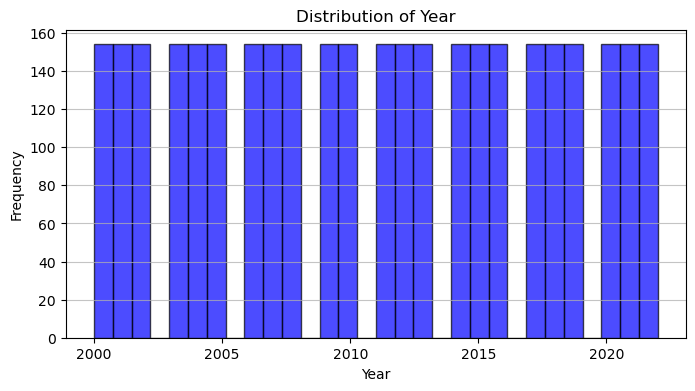

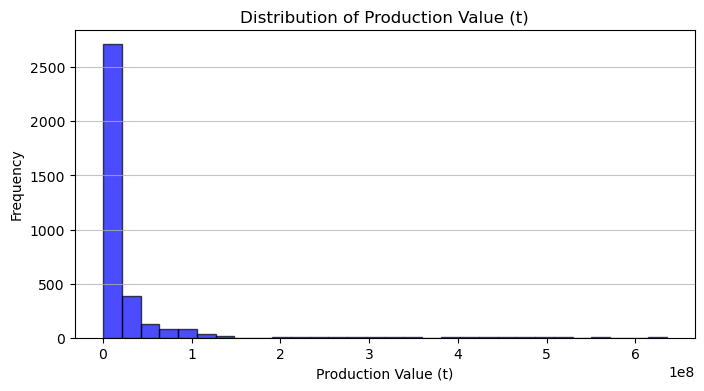

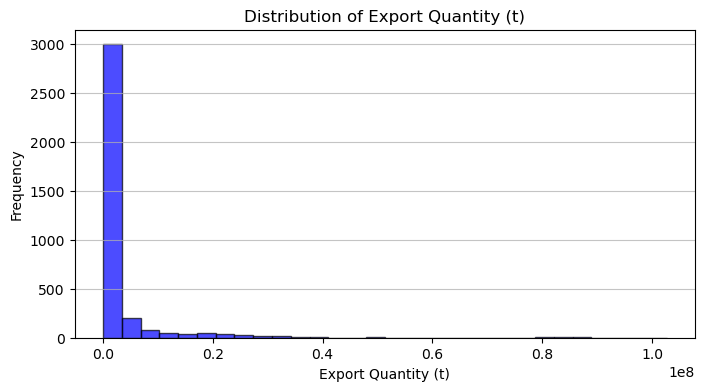

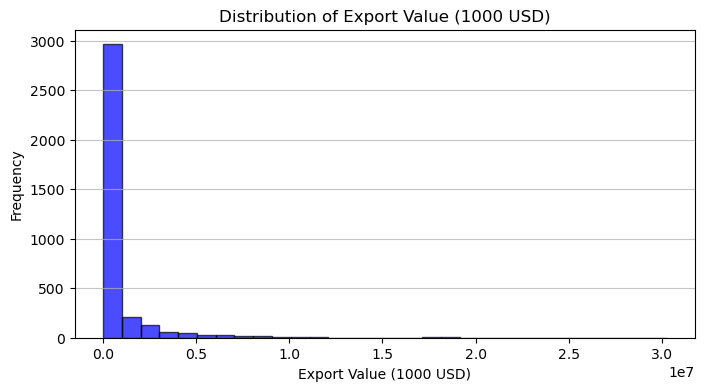

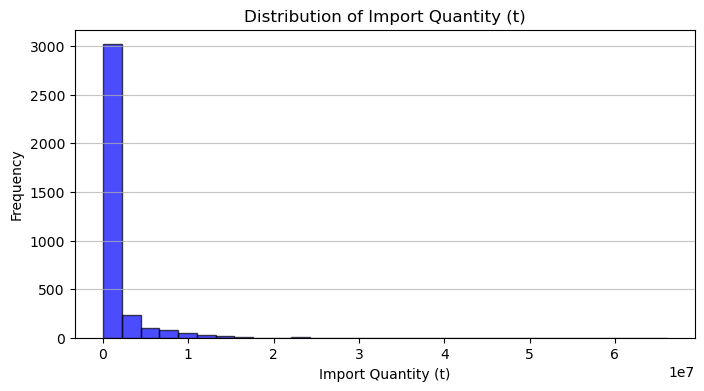

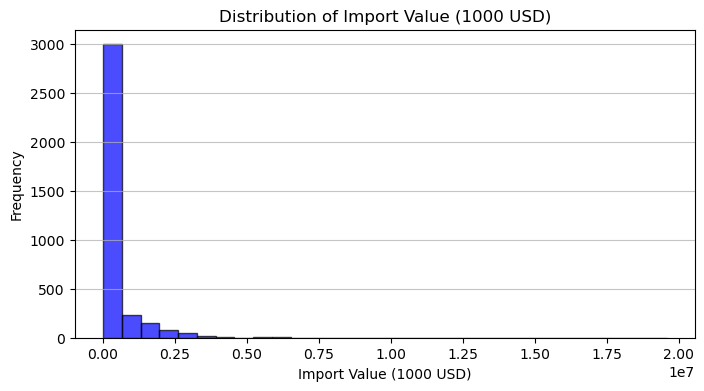

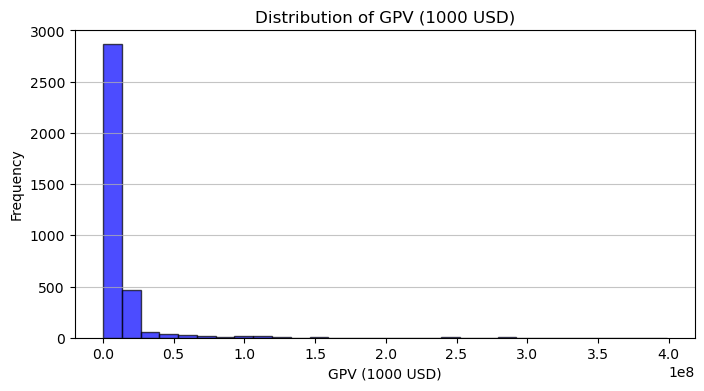

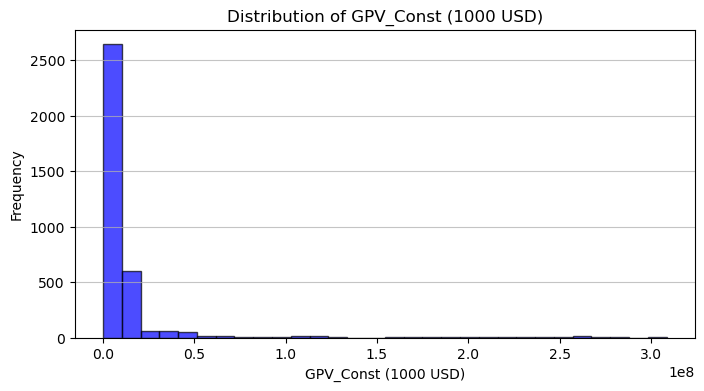

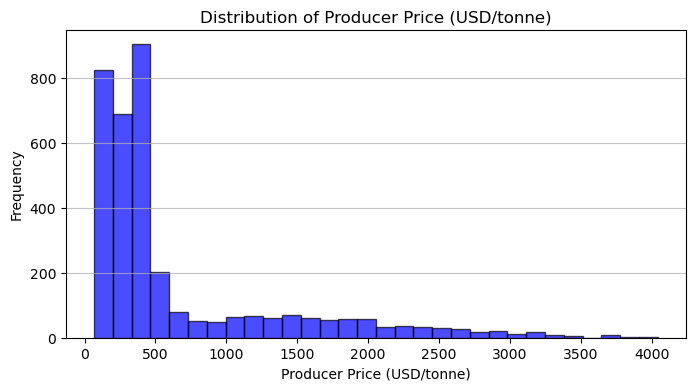

In [10]:
# Identify numerical columns for distribution analysis
numerical_columns_reset = agriculture_data.select_dtypes(include=['float64', 'int64']).columns

# Plot the distribution for each numerical column
for column in numerical_columns_reset:
    plt.figure(figsize=(8, 4))
    plt.hist(agriculture_data[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


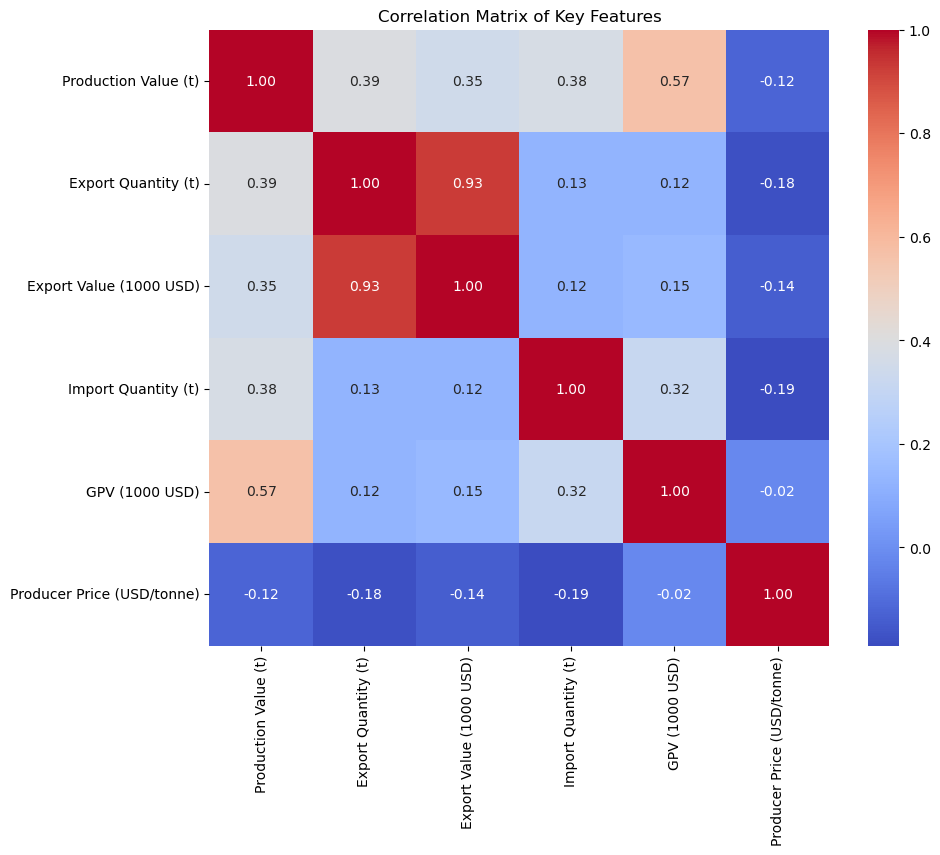

In [11]:
# Compute the correlation matrix for the key features
correlation_matrix = agriculture_data[
    ['Production Value (t)', 'Export Quantity (t)', 'Export Value (1000 USD)', 
     'Import Quantity (t)', 'GPV (1000 USD)', 'Producer Price (USD/tonne)']
].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Features")
plt.show()

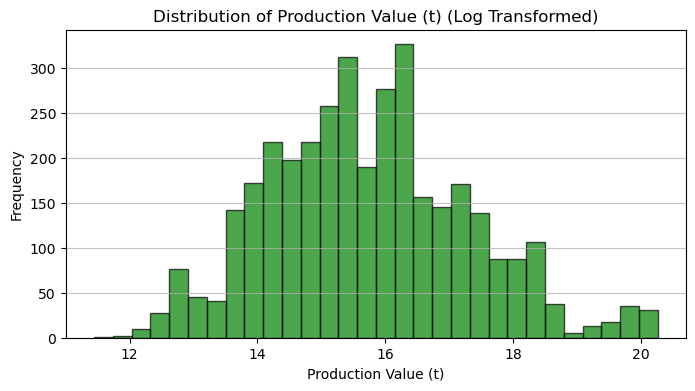

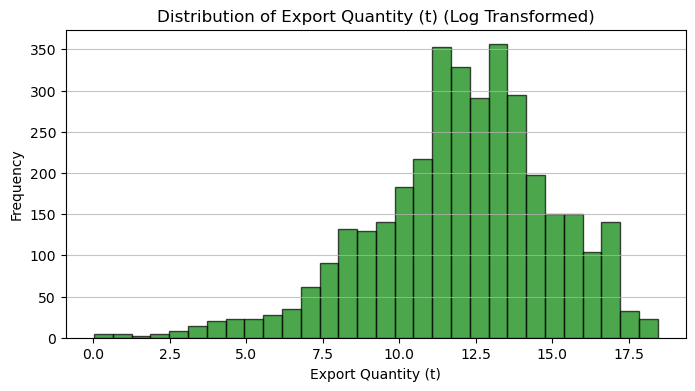

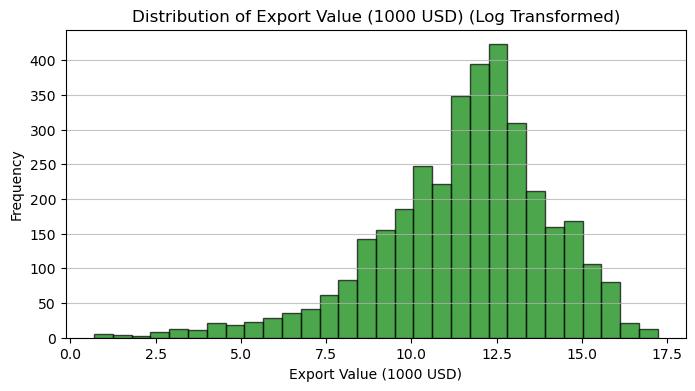

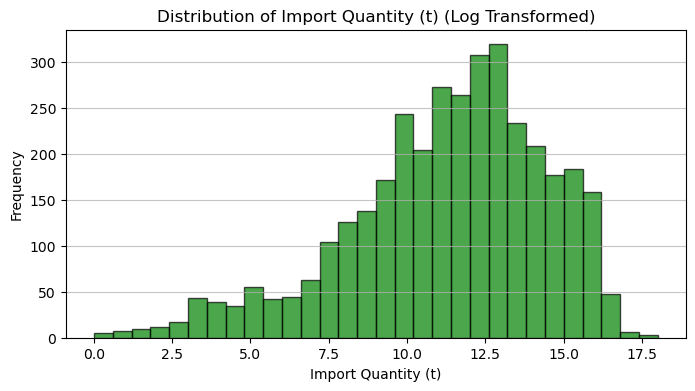

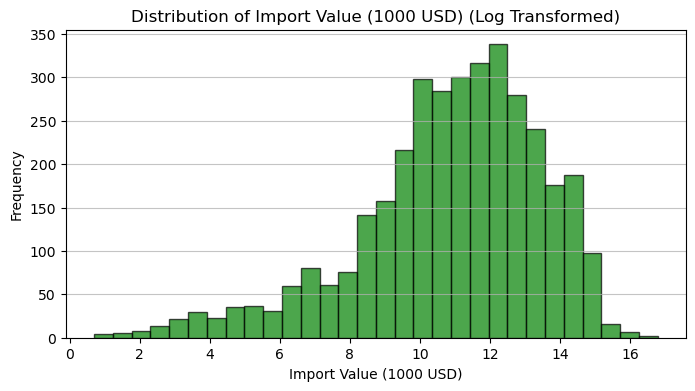

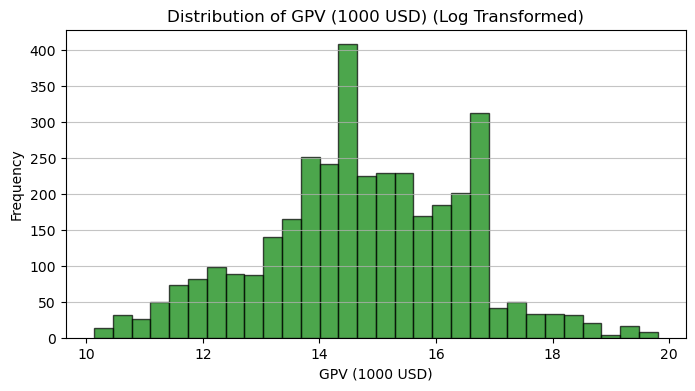

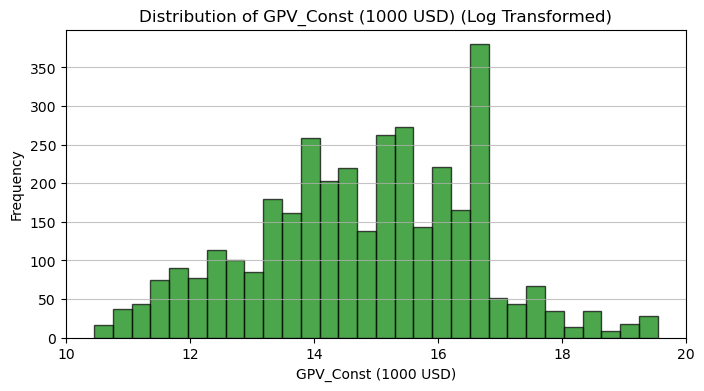

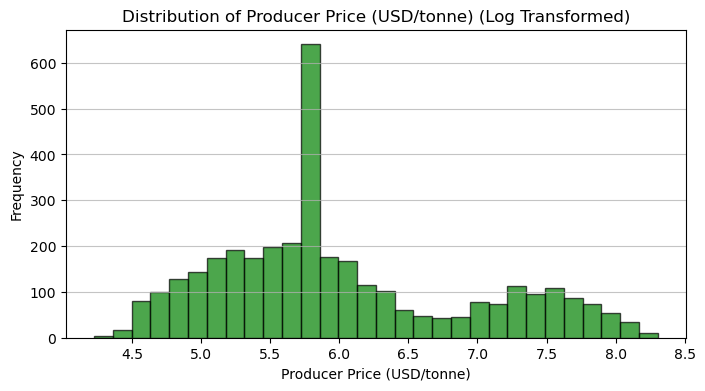

In [14]:
# Apply log transformation to skewed numerical columns
columns_to_transform_reset = [
    'Production Value (t)', 
    'Export Quantity (t)', 
    'Export Value (1000 USD)', 
    'Import Quantity (t)', 
    'Import Value (1000 USD)', 
    'GPV (1000 USD)', 
    'GPV_Const (1000 USD)', 
    'Producer Price (USD/tonne)'
]

# Add a small constant to avoid log(0) issues
data_log_transformed = agriculture_data.copy()
for column in columns_to_transform_reset:
    if (data_log_transformed[column] > 0).all():  # Ensure all values are positive
        data_log_transformed[column] = np.log1p(data_log_transformed[column])

# Verify the transformation by plotting updated distributions
for column in columns_to_transform_reset:
    plt.figure(figsize=(8, 4))
    plt.hist(data_log_transformed[column], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Distribution of {column} (Log Transformed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [15]:
data_log_transformed

,Year,Area,Item,Production Value (t),Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD),GPV (1000 USD),GPV_Const (1000 USD),Producer Price (USD/tonne)
0,2000,0,0,13.49,10.52,8.52,9.72,7.91,11.16,11.48,4.58
1,2000,0,1,17.45,16.95,14.66,10.25,9.86,15.07,15.65,4.57
2,2000,0,2,15.63,3.43,4.32,7.78,8.39,12.40,12.82,6.61
3,2000,0,3,15.23,10.58,11.31,9.20,9.32,15.69,16.71,7.21
4,2000,0,4,16.13,13.80,12.44,8.46,7.82,14.27,15.06,5.05
...,...,...,...,...,...,...,...,...,...,...,...
3537,2022,21,2,18.57,11.58,13.20,9.16,11.28,16.83,16.23,8.04
3538,2022,21,3,17.68,13.46,14.40,12.02,13.82,18.65,18.67,7.70
3539,2022,21,4,18.45,15.83,15.22,13.26,13.90,17.87,17.59,6.33
3540,2022,21,5,18.45,11.63,11.62,9.81,9.81,17.87,17.59,6.33


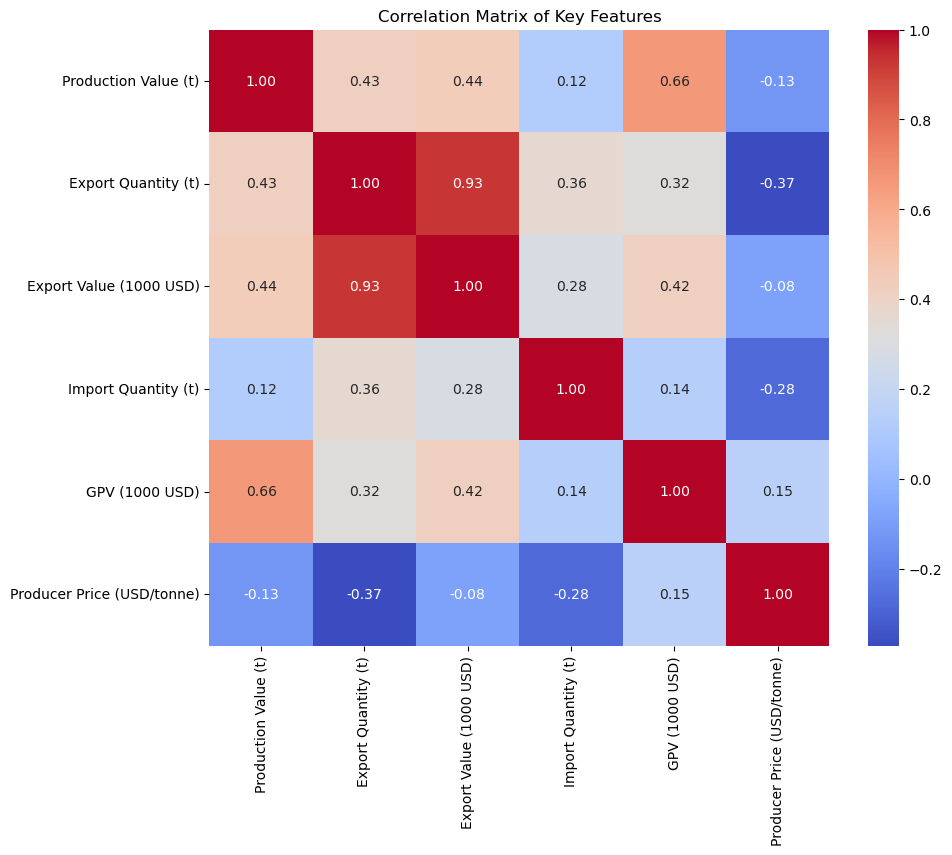

In [18]:
# Compute the correlation matrix for the key features
correlation_matrix = data_log_transformed[
    ['Production Value (t)', 'Export Quantity (t)', 'Export Value (1000 USD)', 
     'Import Quantity (t)', 'GPV (1000 USD)', 'Producer Price (USD/tonne)']
].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Features")
plt.show()

In [20]:
from scipy.stats import kurtosis

# Calculate kurtosis for the original log-transformed and scaled data
kurtosis_original = agriculture_data.kurtosis()
kurtosis_log_transformed = data_log_transformed.kurtosis()

# Combine results for comparison
kurtosis_comparison = pd.DataFrame({
    'Original Kurtosis': kurtosis_original,
    'Log-Transformed Kurtosis': kurtosis_log_transformed,
})

kurtosis_comparison

,Original Kurtosis,Log-Transformed Kurtosis
Year,-1.20,-1.20
Area,-1.20,-1.20
Item,-1.25,-1.25
Production Value (t),34.24,-0.03
Export Quantity (t),50.36,0.68
Export Value (1000 USD),53.49,1.35
Import Quantity (t),102.11,0.37
Import Value (1000 USD),123.65,0.85
GPV (1000 USD),69.56,-0.11
GPV_Const (1000 USD),43.26,-0.36


# Linear Regression Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the log-transformed data for modeling
features = [ 'Year', 'Area', 'Item', 'Production Value (t)', 'Export Quantity (t)', 
            'Producer Price (USD/tonne)',]
target = 'Export Value (1000 USD)'

X_train_log = data_log_transformed[features]  # Updated from X_log
y_train_log = data_log_transformed[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_log, y_train_log, test_size=0.3, random_state=42
)

# Train a Linear Regression model on the log-transformed data
linear_model_log = LinearRegression()
linear_model_log.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = linear_model_log.predict(X_test)

# Evaluate the model
mse_log = mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

# Summarize model performance after log transformation
performance_metrics_log = {
    'Mean Squared Error (MSE)': mse_log,
    'Mean Absolute Error (MAE)': mae_log,
    'R-squared (R2)': r2_log
}

performance_metrics_log

{'Mean Squared Error (MSE)': 0.30997583448599875,
 'Mean Absolute Error (MAE)': 0.3574619462872425,
 'R-squared (R2)': 0.955653350497632}

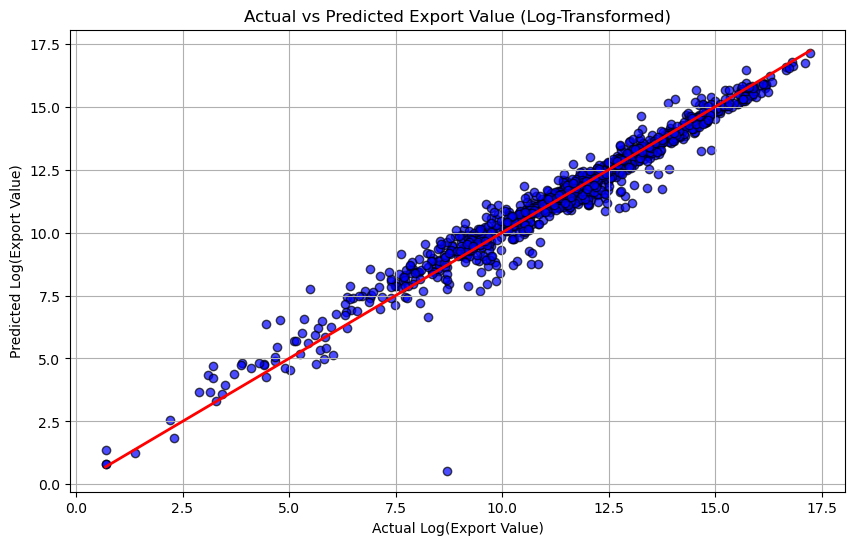

In [25]:
# Plot actual vs predicted values for the log-transformed target variable
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_log, alpha=0.7, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted Export Value (Log-Transformed)")
plt.xlabel("Actual Log(Export Value)")
plt.ylabel("Predicted Log(Export Value)")
plt.grid(True)
plt.show()



In [27]:
# Extract coefficients from the linear model
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': linear_model_log.coef_
}).sort_values(by='Coefficient', ascending=False)

intercept = linear_model_log.intercept_

coefficients, intercept


(                      Feature  Coefficient
 4         Export Quantity (t)         0.86
 5  Producer Price (USD/tonne)         0.83
 3        Production Value (t)         0.07
 0                        Year         0.01
 1                        Area        -0.01
 2                        Item        -0.01,
 -33.03873657357071)

In [29]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the linear model using the log-transformed data
cv_scores = cross_val_score(
    linear_model_log, 
    X_train_log, 
    y_train_log, 
    cv=5,  # 5-fold cross-validation
    scoring='r2'  # Using R-squared as the metric
)

# Summarize cross-validation results
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)
cv_results = {
    'Cross-Validation Mean R-squared': cv_mean,
    'Cross-Validation Std R-squared': cv_std,
    'Individual R-squared Scores': cv_scores.tolist()
}

cv_results


{'Cross-Validation Mean R-squared': 0.9368097691660022,
 'Cross-Validation Std R-squared': 0.02306932029636971,
 'Individual R-squared Scores': [0.9327345195440223,
  0.9608894733056988,
  0.9412964669426325,
  0.8950304059567665,
  0.9540979800808902]}

# Random Forest with hyperparameters

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict on the test set
y_pred_rf = best_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display model performance metrics
print("Random Forest Model Performance:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared (R²): {r2_rf:.4f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Random Forest Model Performance:
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'bootstrap': True}
Mean Squared Error (MSE): 0.1515
Mean Absolute Error (MAE): 0.2052
R-squared (R²): 0.9783


In [33]:
# Retry fitting the RandomizedSearchCV model and evaluating performance
random_search.fit(X_train, y_train)

# Best hyperparameters and model evaluation
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

best_params, mse_rf, mae_rf, r2_rf


Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'n_estimators': 400,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': 40,
  'bootstrap': True},
 0.15147474295078994,
 0.20520984323851782,
 0.9783292870386534)

In [34]:
# Extract feature importances from the best Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Ensures the features match the training data
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# No intercept exists for Random Forest models, as they are non-linear ensemble methods.
feature_importances



,Feature,Importance
4,Export Quantity (t),0.89
5,Producer Price (USD/tonne),0.07
3,Production Value (t),0.02
2,Item,0.01
0,Year,0.01
1,Area,0.00


# Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter grid for Ridge regression
ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# Initialize Ridge regression model
ridge = Ridge()

# Grid search for Ridge regression
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',
    cv=5  # 5-fold cross-validation
)

# Fit the model to training data
ridge_grid.fit(X_train, y_train)

# Extract best parameters and model
best_ridge_params = ridge_grid.best_params_
best_ridge_model = ridge_grid.best_estimator_

# Evaluate the best Ridge model on the test set
y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display results
print("Best Random Forest Hyperparameters:", best_params)
print("Random Forest Model Performance:")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R2: {r2_rf:.4f}")



Best Random Forest Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'bootstrap': True}
Random Forest Model Performance:
MSE: 0.1515
MAE: 0.2052
R2: 0.9783


In [37]:
# Extract feature coefficients from the trained Ridge model
ridge_coefficients = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure features match the training set
    'Coefficient': best_ridge_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print(ridge_coefficients)


                      Feature  Coefficient
4         Export Quantity (t)         0.86
5  Producer Price (USD/tonne)         0.82
3        Production Value (t)         0.07
0                        Year         0.01
1                        Area        -0.01
2                        Item        -0.01


# Comparison of the model

In [39]:
# Initialize dictionaries to store performance metrics
model_performance = {}

# Linear Regression
linear_model_log.fit(X_train, y_train)
y_pred_linear = linear_model_log.predict(X_test)

model_performance['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'MAE': mean_absolute_error(y_test, y_pred_linear),
    'R2': r2_score(y_test, y_pred_linear)
}

# Random Forest
random_forest = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

model_performance['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can use the best alpha found via GridSearchCV
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

model_performance['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}

# Create a DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance).T

# Print the DataFrame
print("Model Performance Comparison:")
print(performance_df)




Model Performance Comparison:
                   MSE  MAE   R2
Linear Regression 0.31 0.36 0.96
Random Forest     0.16 0.23 0.98
Ridge Regression  0.31 0.36 0.96


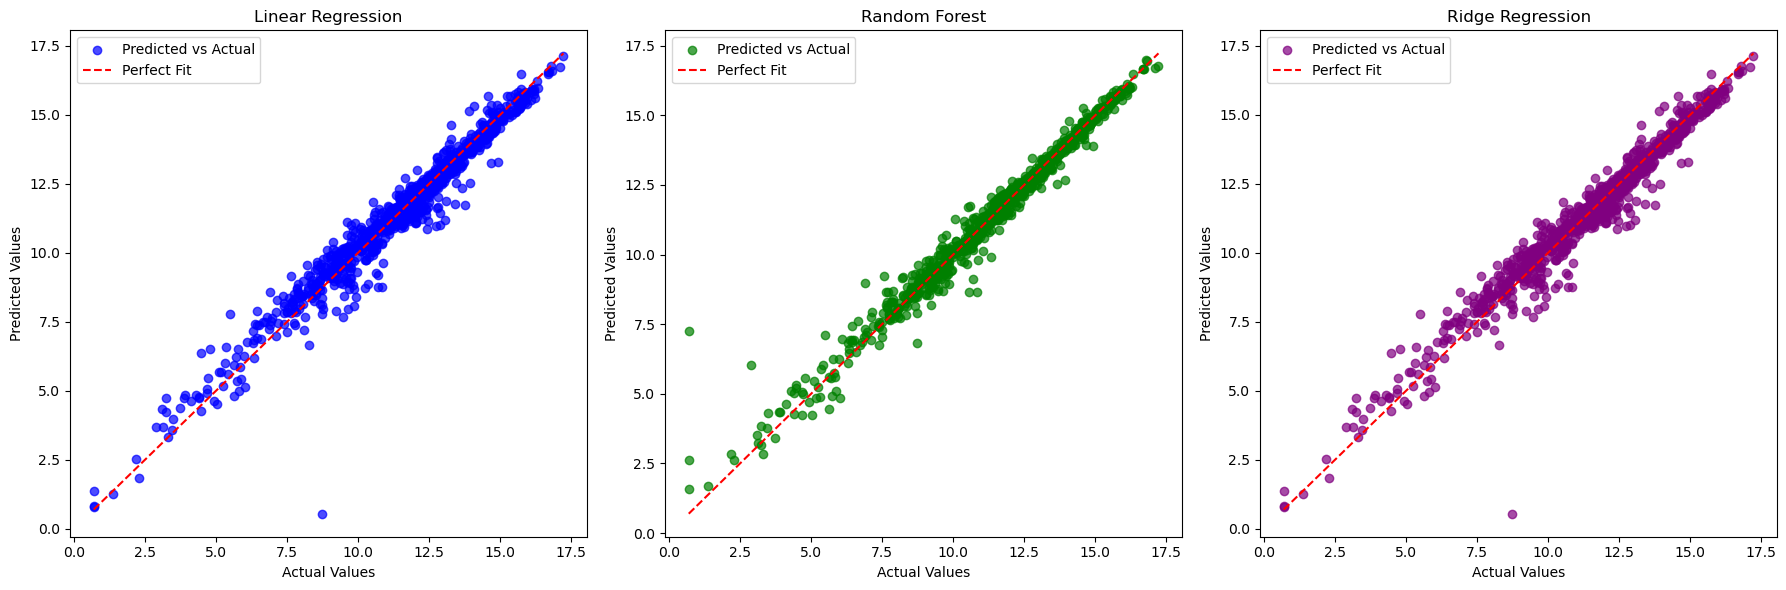

In [40]:
# Predictions for each model
y_pred_linear = linear_model_log.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Plotting the results
plt.figure(figsize=(18, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()

# Scatter plot for Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest')
plt.legend()

# Scatter plot for Ridge Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')
plt.legend()

plt.tight_layout()
plt.show()


In [66]:
import joblib
# Save the model
joblib.dump(linear_model_log, 'Analysis/linear_model_log.pkl')

['Analysis/linear_model_log.pkl']

# Forecast

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Reload the newly uploaded CSV file to ensure we have the latest data
file_path_updated = 'Analysis/agriculture_data_replaced.csv'
data = pd.read_csv(file_path_updated)

# Display the first few rows of the updated dataset to confirm its structure
data.head()

,Year,Area,Item,Production Value (t),Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD),GPV (1000 USD),GPV_Const (1000 USD),Producer Price (USD/tonne)
0,2000,Argentina,Barley,722490.0,36926.56,4991.00,16563.52,2718.00,70117.0,96771.0,97.00
1,2000,Argentina,"Cereals, primary",37983923.0,22932025.00,2336236.82,28333.11,19182.04,3522037.0,6251729.0,95.19
2,2000,Argentina,"Hen eggs in shell, fresh",6165055.0,29.85,74.00,2394.27,4389.00,243361.0,369664.0,744.40
3,2000,Argentina,"Meat, Total",4101293.0,39348.35,81699.69,9885.38,11174.63,6505490.0,18148194.0,1354.26
4,2000,Argentina,"Milk, Total",10121330.0,985564.44,251620.40,4736.50,2499.45,1569591.0,3467487.0,155.10


In [2]:
# Filter data for Ireland and Barley
user_input_area = "Ireland"
user_input_item = "Barley"
user_input_export_value = 18000

filtered_data = data[(data['Area'] == user_input_area) & (data['Item'] == user_input_item)]
filtered_data = filtered_data.sort_values('Year')

In [3]:
# Ensure consistent time index
filtered_data.set_index('Year', inplace=True)
export_values = filtered_data['Export Value (1000 USD)']

# Add user input as the last year
export_values.loc[filtered_data.index.max() + 1] = user_input_export_value

C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


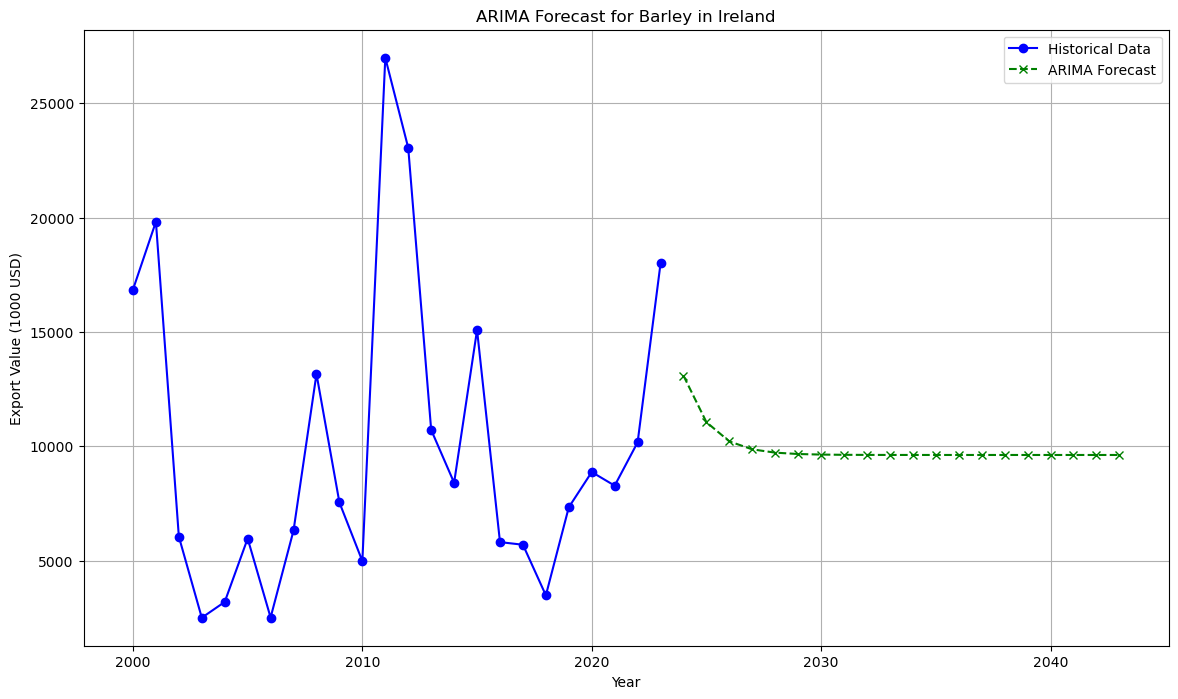

In [4]:
from statsmodels.tsa.arima.model import ARIMA
# Train ARIMA model
arima_model = ARIMA(export_values, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Forecast for the next 20 years
forecast_steps = 20
arima_forecast = arima_model_fit.forecast(steps=forecast_steps)

# Prepare data for comparison
sarima_forecast_years = range(export_values.index.max() + 1, export_values.index.max() + 1 + forecast_steps)

# Plot comparison
plt.figure(figsize=(14, 8))
plt.plot(export_values, label='Historical Data', marker='o', color='blue')
plt.plot(sarima_forecast_years, arima_forecast, label='ARIMA Forecast', linestyle='--', marker='x', color='green')
plt.title(f"ARIMA Forecast for {user_input_item} in {user_input_area}")
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.legend()
plt.grid()
plt.show()



C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


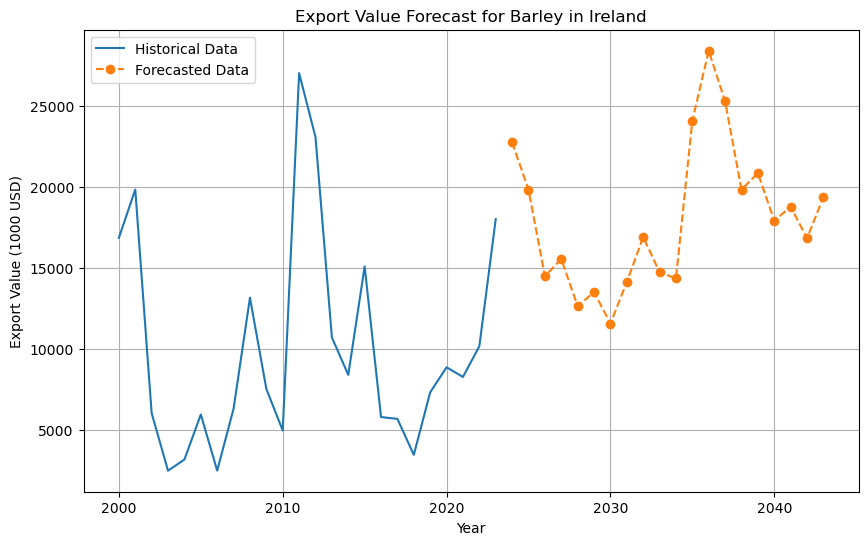

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMAX model
model = SARIMAX(export_values, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast for the next 20 years
forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(export_values, label='Historical Data')
plt.plot(range(export_values.index.max() + 1, export_values.index.max() + 1 + forecast_steps), forecast, label='Forecasted Data', linestyle='--', marker='o')
plt.title(f"Export Value Forecast for {user_input_item} in {user_input_area}")
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.legend()
plt.grid()
plt.show()

C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


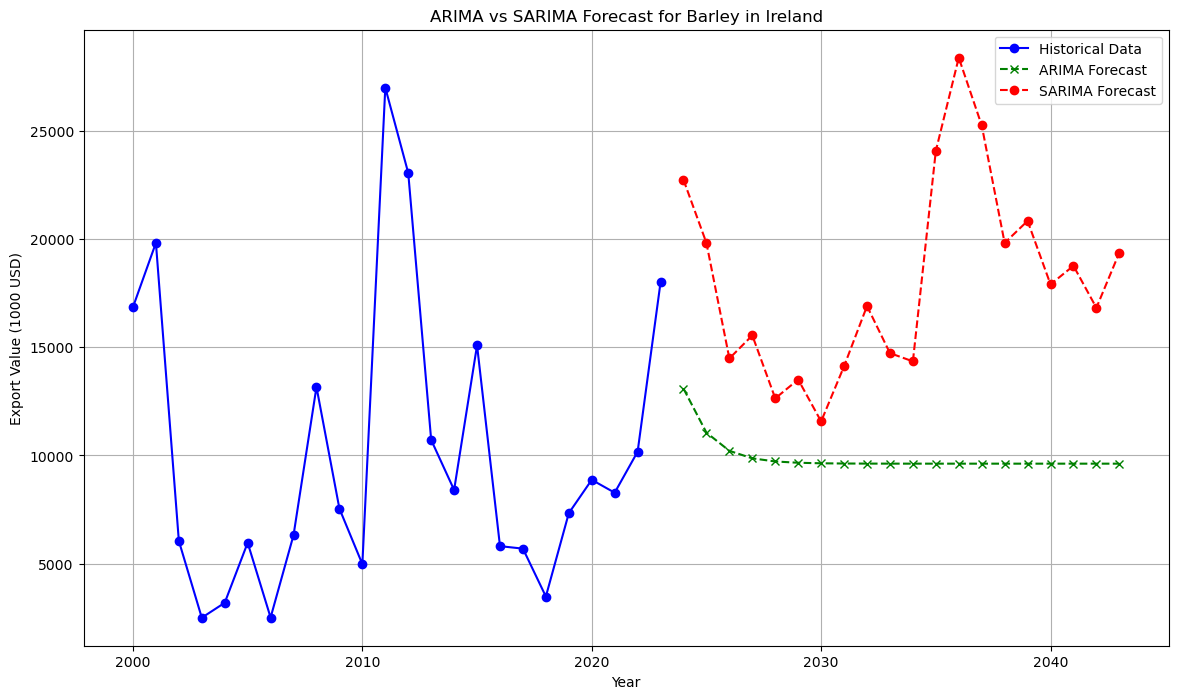

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA model again for comparison
sarima_model = SARIMAX(export_values, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# SARIMA Forecast for the next 20 years
sarima_forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Plot ARIMA vs SARIMA Comparison
plt.figure(figsize=(14, 8))
plt.plot(export_values, label='Historical Data', marker='o', color='blue')
plt.plot(sarima_forecast_years, arima_forecast, label='ARIMA Forecast', linestyle='--', marker='x', color='green')
plt.plot(sarima_forecast_years, sarima_forecast, label='SARIMA Forecast', linestyle='--', marker='o', color='red')
plt.title(f"ARIMA vs SARIMA Forecast for {user_input_item} in {user_input_area}")
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.legend()
plt.grid()
plt.show()

# Sarima Model Selected

In [11]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


# Best parameters for sarmia model

In [14]:
# Define reduced parameter ranges for faster tuning
p = d = q = range(0, 2)  # Non-seasonal parameters (reduced range)
P = D = Q = range(0, 2)  # Seasonal parameters (reduced range)
m = 12  # Seasonal periodicity

# Create combinations of parameters for grid search
parameters = [(i, j, k, l, m, n) for i in p for j in d for k in q for l in P for m in D for n in Q]

best_aic = float("inf")
best_params = None

# Perform grid search with reduced range
for (i, j, k, l, m, n) in parameters:
    try:
        # Fit SARIMAX model
        model = SARIMAX(export_values, order=(i, j, k), seasonal_order=(l, m, n, 12))
        model_fit = model.fit(disp=False)
        
        # Store AIC and update best model
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_params = ((i, j, k), (l, m, n))
    except Exception:
        continue

best_params, best_aic


C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

(((0, 1, 0), (1, 1, 0)), 224.95147109810512)

C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\feder\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


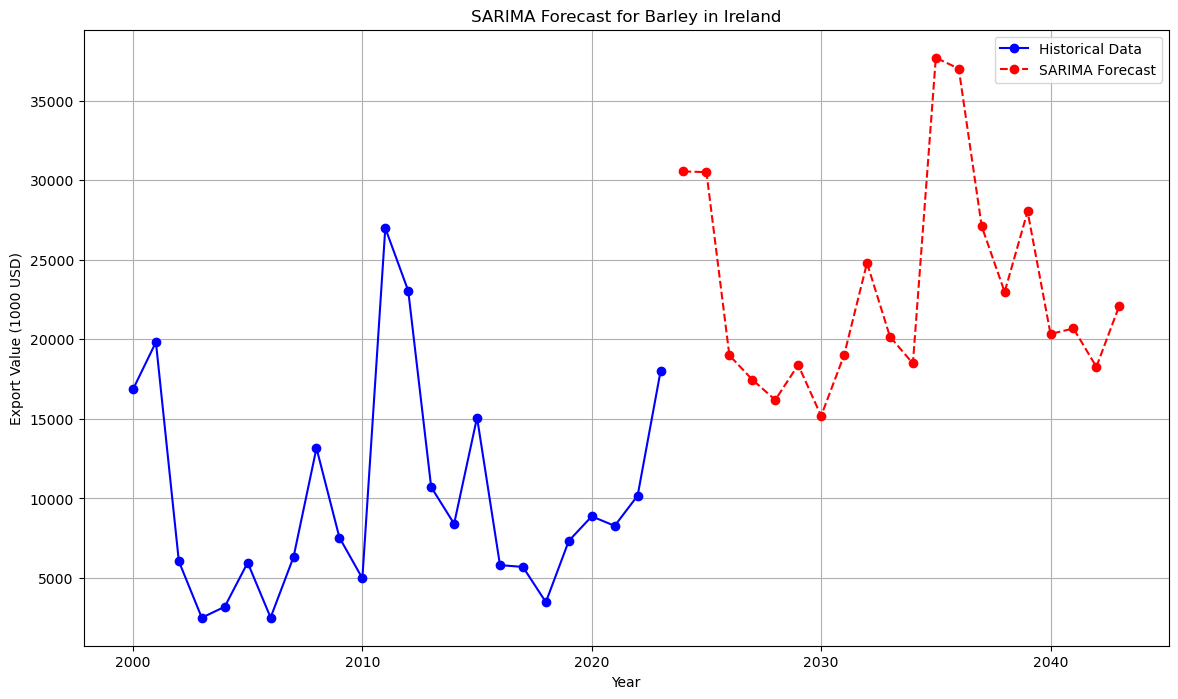

In [17]:
# Apply the best parameters to fit the SARIMA model
best_order, best_seasonal_order = best_params

# Fit the SARIMA model with the optimal parameters
optimal_model = SARIMAX(export_values, order=best_order, seasonal_order=(*best_seasonal_order, 12))
optimal_model_fit = optimal_model.fit(disp=False)

# Forecast for the next 20 years
forecast_steps = 20
forecast = optimal_model_fit.forecast(steps=forecast_steps)

# Prepare forecast years
forecast_years = range(export_values.index.max() + 1, export_values.index.max() + 1 + forecast_steps)

# Plot the forecasted results
plt.figure(figsize=(14, 8))
plt.plot(export_values, label='Historical Data', marker='o', color='blue')
plt.plot(forecast_years, forecast, label='SARIMA Forecast', linestyle='--', marker='o', color='red')
plt.title(f"SARIMA Forecast for {user_input_item} in {user_input_area}")
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.legend()
plt.grid()
plt.show()


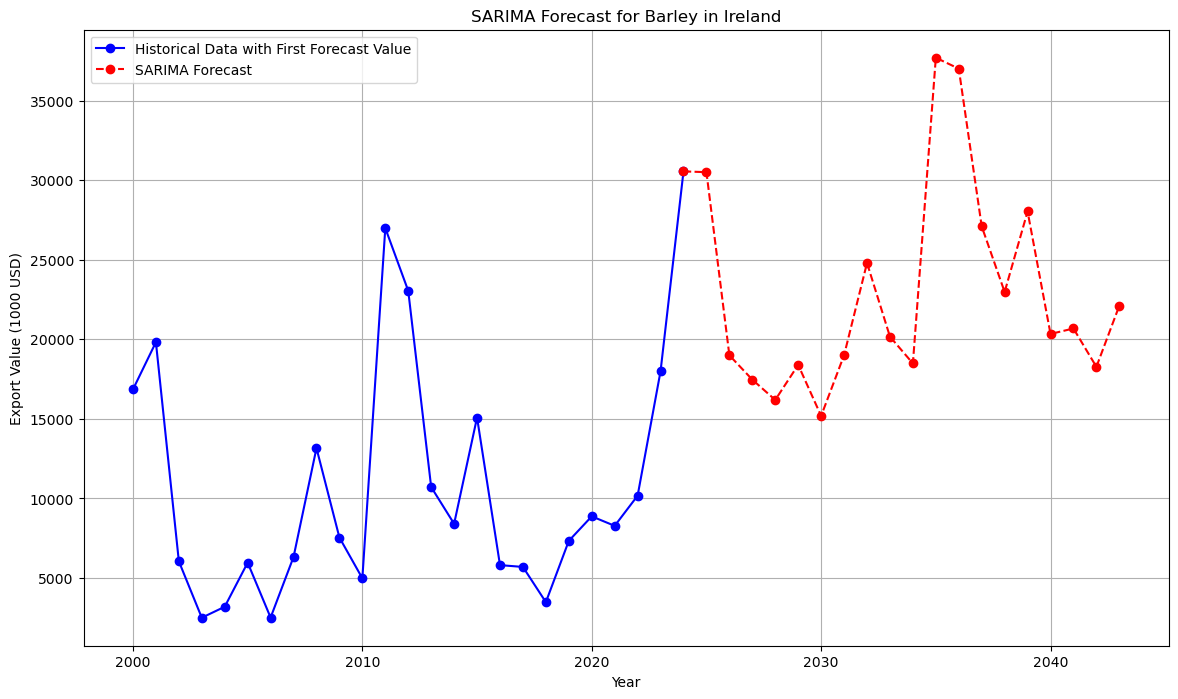

In [18]:
# Combine historical data with the first forecasted value using pd.concat
combined_data = pd.concat([export_values, pd.Series([forecast.iloc[0]], index=[export_values.index.max() + 1])])

# Plot the combined data and forecast
plt.figure(figsize=(14, 8))
plt.plot(combined_data, label='Historical Data with First Forecast Value', marker='o', color='blue')
plt.plot(forecast_years, forecast, label='SARIMA Forecast', linestyle='--', marker='o', color='red')
plt.title(f"SARIMA Forecast for {user_input_item} in {user_input_area}")
plt.xlabel('Year')
plt.ylabel('Export Value (1000 USD)')
plt.legend()
plt.grid()
plt.show()